In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [ ]:
oecd_bli_2015 = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv", error_bad_lines=False, thousands=',')

In [ ]:
gdp_per_capital = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capital):
  oecd_bli = oecd_bli_2015[oecd_bli_2015["INEQUALITY"] == "TOT"]
  oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
  gdp_per_capital.rename(columns={"2015": "GDP per capital"}, inplace=True)
  gdp_per_capital.set_index("Country", inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capital, left_index=True, right_index=True)
  full_country_stats.sort_values(by="GDP per capital", inplace=True)
  remove_indices = [0, 1, 6, 8, 33, 34, 35]
  keep_indices = list(set(range(36)) - set(remove_indices))
  return full_country_stats[["GDP per capital", "Life satisfaction"]].iloc[keep_indices]

In [ ]:
country_stats = prepare_country_stats(oecd_bli_2015, gdp_per_capital)

[[5.96242]]


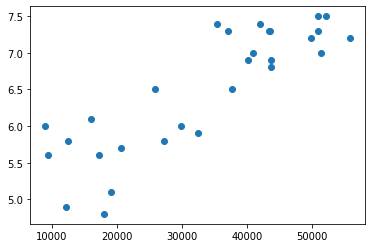

In [150]:
X = np.c_[country_stats["GDP per capital"]]
y = np.c_[country_stats["Life satisfaction"]]

plt.scatter(x=X, y=y)

model = sklearn.linear_model.LinearRegression()

model.fit(X, y)

X_new = [[22587]]

print(model.predict(X_new))